<a href="https://colab.research.google.com/github/artanebibi/datascience/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

In [3]:
np.random.seed(seed=42)

In [4]:
X = np.empty((150, 2))
y = np.empty((150,))

X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)
y[:50] = np.full(fill_value=0, shape=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)
y[50:100] = np.full(fill_value=1, shape=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)
y[100:150] = np.full(fill_value=2, shape=50)

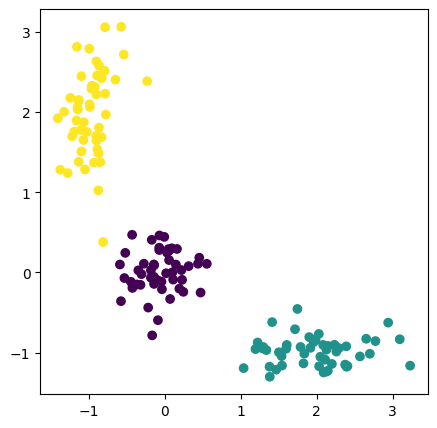

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)

Step 1 - choose k number of points randomly to be the centroids of the k - number of clusters

In [6]:
k = 3
indices = np.random.choice(X.shape[0], k, replace=False)
centroids = X[indices].copy()

Step 2 - calculating distances from each point to the closest centroid and recomputing the centroids based on the mean of the points inside the cluster

In [7]:
history = []
history.append(centroids)

for i in range(4):
    # Calculate the distances from the points to the centroid.
    distances = cdist(X, centroids)
    # Find the closest centroid to each point.
    labels = distances.argmin(axis=1)

    # Recompute the centroids.
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    history.append(centroids)

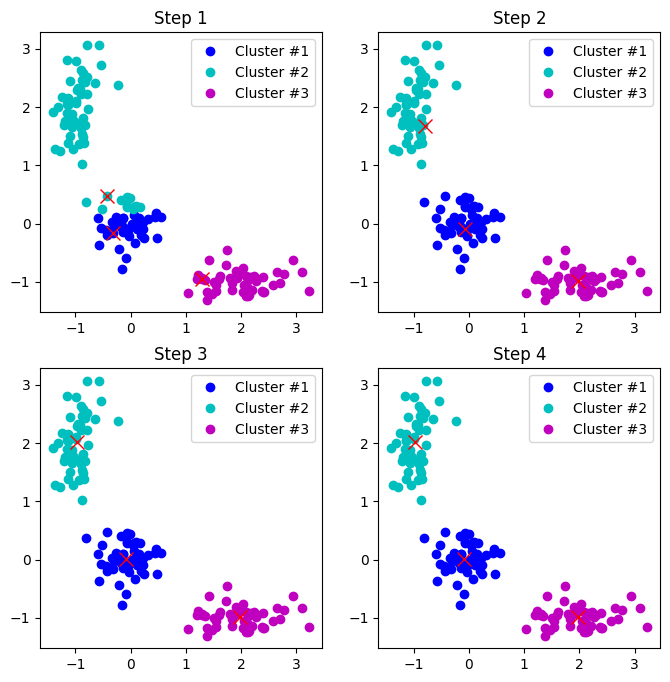

In [8]:
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], "bo", label="Cluster #1")
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], "co", label="Cluster #2")
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], "mo", label="Cluster #3")
    plt.plot(history[i][:, 0], history[i][:, 1], "rx", ms=10)
    plt.legend(loc=0)
    plt.title(f"Step {i + 1}");

In [9]:
inertias = []
iterations = range(1, 10)
for k in iterations:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$WSS$')

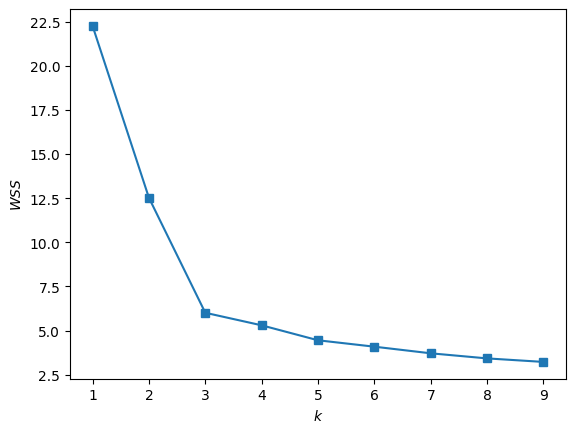

In [10]:
plt.plot(iterations, inertias, marker="s")
plt.xlabel("$k$")
plt.ylabel("$WSS$")

In [11]:
knee_locator = KneeLocator(iterations, inertias, curve="convex", direction="decreasing")
print(f"k: {knee_locator.knee}, WSS: {inertias[knee_locator.knee - 1]}")


k: 3, WSS: 6.0049922077255


Text(0, 0.5, '$WSS$')

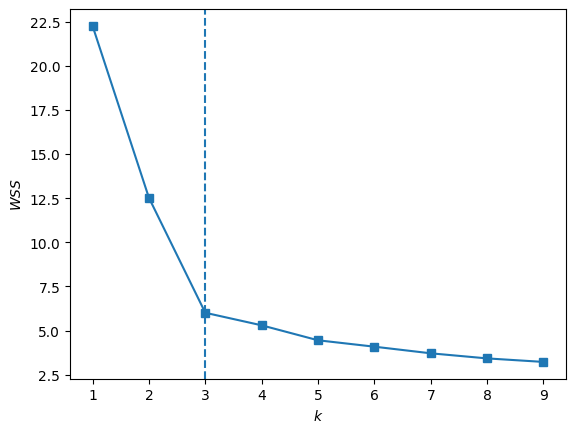

In [12]:
plt.plot(iterations, inertias, marker="s")
plt.axvline(x=knee_locator.knee, ls="--", label="elbow")
plt.xlabel("$k$")
plt.ylabel("$WSS$")

the knee locator finds the optimal number of clusters in a set of points. We can see this in the graph where the Within Sum of squares starts to improve drastically

<h4> Agglomerative clustering

In [13]:
# recreating some points for testing
X = np.empty((150, 2))
y = np.empty((150,))

X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)
y[:50] = np.full(fill_value=0, shape=50)

X[50:100, 0] = np.random.normal(loc=3.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)
y[50:100] = np.full(fill_value=1, shape=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.9, size=50)
y[100:150] = np.full(fill_value=2, shape=50)

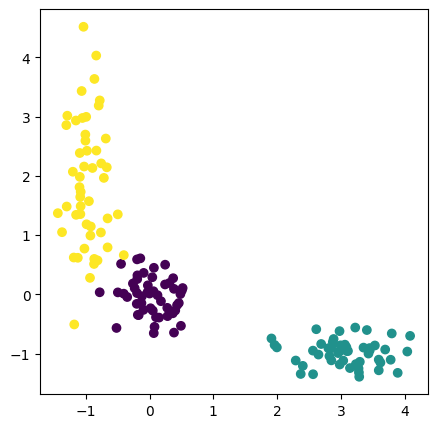

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)

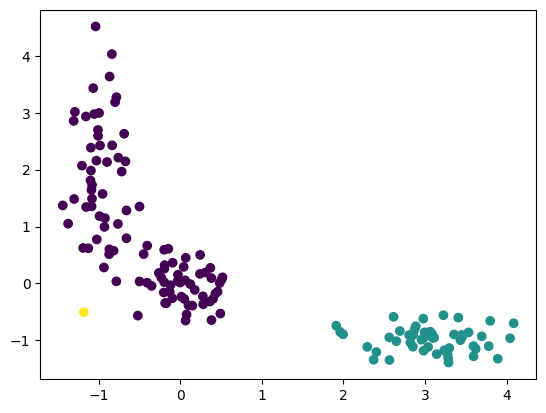

In [18]:
single_linkage = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=single_linkage.labels_)

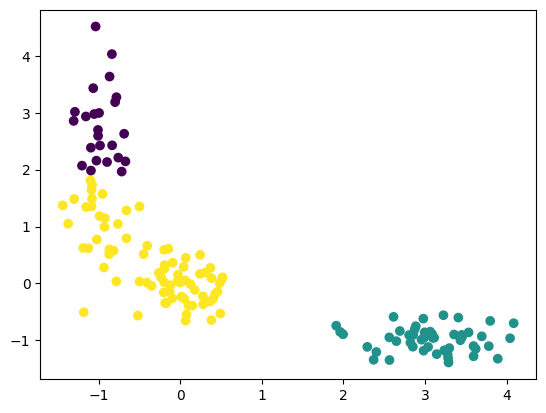

In [19]:
average_linkage = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=average_linkage.labels_)

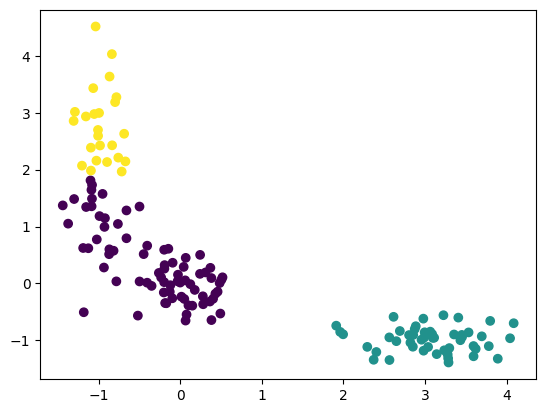

In [20]:
ward_linkage = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=ward_linkage.labels_)

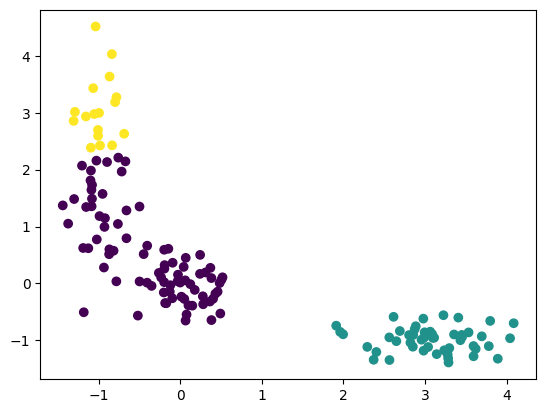

In [23]:
complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=complete_linkage.labels_)

<h1> TEXT CLUSTERING

In [26]:
model = SentenceTransformer("all-mpnet-base-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [34]:
sentences = [
    "Data science is difficult",
    "Predicting stocks is almost impossible",

    "Calculus was invented for a reason",
    "Pythagora said everything can be represented with numbers"
]

In [35]:
embbedings = model.encode(sentences=sentences)

In [36]:
len(embbedings)

4

In [37]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  plot = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="Blues")


  plot.set_xticklabels(labels, rotation=rotation)
  plot.set_title("Semantic Textual Similarity")

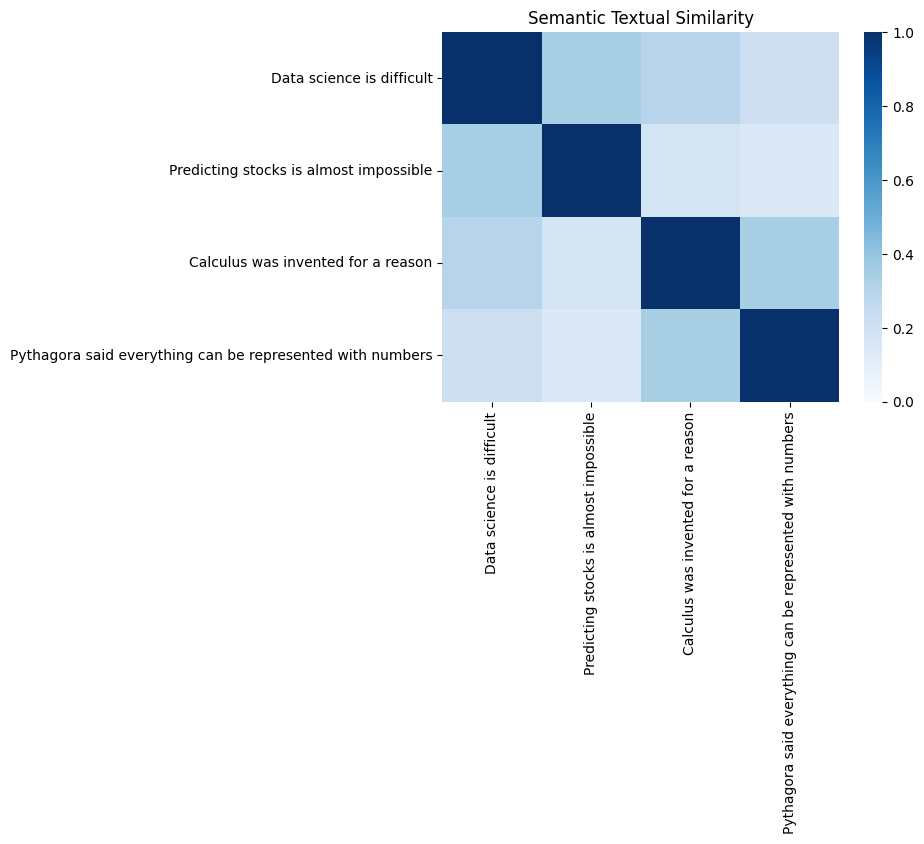

In [38]:
plot_similarity(sentences, embbedings, 90)